<a href="https://colab.research.google.com/github/RealB1ackY/ISnT_Lab5-6/blob/main/PR3_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

# df = pd.read_csv("dataset/glass.csv")
#просмотр измерений набора данных
df.shape
#предварительный просмотр набора данных
df.head()

,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
col_names = ["Exam 1 marks","Exam 2 marks","Admission status"]

df['Admission status'].value_counts()

1    60
0    40
Name: Admission status, dtype: int64

In [ ]:
X = df.drop(['Admission status'], axis=1)
y = df['Admission status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, "\n", y_train.shape, y_test.shape

((67, 2), (33, 2), '\n', (67,), (33,))

In [ ]:
# check data types in X_train

X_train.dtypes

Exam 1 marks    float64
Exam 2 marks    float64
dtype: object

In [ ]:
X_train.head()

,Exam 1 marks,Exam 2 marks
28,61.830206,50.256108
93,74.492692,84.845137
5,45.083277,56.316372
66,40.457551,97.535185
65,66.560894,41.092098


In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Оценка точности модели с использованием 10 деревьев принятия решений : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#Здесь y_test - это истинные метки классов, а y_pred - это предсказанные метки классов в тестовом наборе.

Оценка точности модели с использованием 10 деревьев принятия решений : 0.8485


In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Оценка точности модели с использованием 100 деревьев принятия решений : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Оценка точности модели с использованием 100 деревьев принятия решений : 0.8485


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores
#Мы видим, что наиболее важной особенностью является Exam 1 marks, а наименее важной - Exam 2 marks.

Exam 1 marks    0.54604
Exam 2 marks    0.45396
dtype: float64

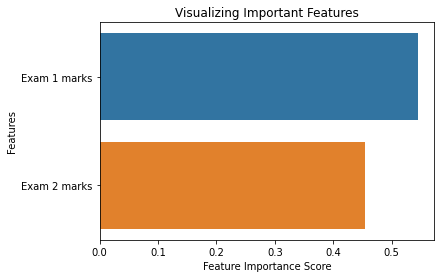

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.78      0.88        23

    accuracy                           0.85        33
   macro avg       0.83      0.89      0.84        33
weighted avg       0.90      0.85      0.85        33



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\nТочность классификации : {0:0.4f}'.format(classification_accuracy))

#Ошибка классификации
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Ошибка классификации : {0:0.4f}'.format(classification_error))

#вывод оценки точности
precision = TP / float(TP + FP)

print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

F1 = 2 * (precision * recall) / (precision + recall)

print('F1: {0:0.4f}'.format(F1))

Confusion matrix

 [[10  0]
 [ 5 18]]

Точность классификации : 0.8485
Ошибка классификации : 0.1515

Precision : 1.0000
Recall : 0.6667
F1: 0.8000


In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_estimators':np.arange(1,150)}

rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149])})

In [ ]:
rf_cv.best_score_

0.97

In [ ]:
rf_cv.best_params_

{'n_estimators': 74}

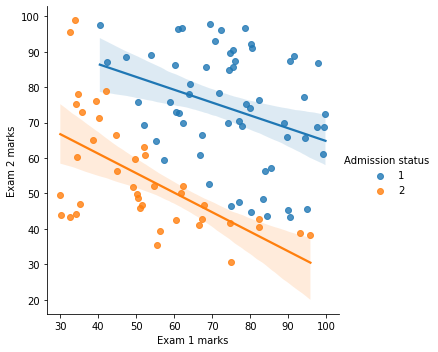

In [ ]:
import seaborn as sns # for statistical data visualizatio
from pandas import *

#df = read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

def diagnosis_value(Status):
    if Status == 1:
        return 1
    else:
        return 2
df['Admission status'] = df['Admission status'].apply(diagnosis_value)

sns.lmplot(x = 'Exam 1 marks', y = 'Exam 2 marks', hue = 'Admission status', data = df)

In [ ]:
from sklearn.tree import export_graphviz

# Export as dot file

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

rfc = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
rfc.fit(X_train, y_train)

def print_all_forest(estimator, i):
  export_graphviz(estimator, out_file=f'tree{i}.dot', 
                  feature_names = df.columns[0:-1],
                  class_names = ["0", "1"],
                  rounded = True, proportion = False, 
                  precision = 2, filled = True)

  # Convert to png using system command (requires Graphviz)
  from subprocess import call
  call(['dot', '-Tpng', f'tree{i}.dot', '-o', f'tree{i}.png', '-Gdpi=600'])

  # # Display in jupyter notebook
  # from IPython.display import Image
  # Image(filename = f'tree{i}.png')

for i, val in enumerate(rfc.estimators_[:2]):
  print_all_forest(val, i)

In [ ]:
from IPython.display import Image

for i in range(len(rfc.estimators_[:2])):
  Image(filename = f'tree{i}.png')





In [ ]:
# from sklearn import *

# tree.